# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] 
        city_humidity = city_weather["main"]["humidity"]  
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"] 
        city_country = city_weather["sys"]["country"]   
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)     
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | morondava
Processing Record 5 of Set 1 | san sebastian de la gomera
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | malango
Processing Record 8 of Set 1 | bundaberg north
Processing Record 9 of Set 1 | kazalinsk
'coord'
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | tingi
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | praya
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | kovalam
Processing Record 17 of Set 1 | santa cruz
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | chinhoyi
Processing Record 20 of Set 1 | fort bragg
Processing Record 21 of Set 1 | labrador city
Processing Record 22 of Set 1 | to

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          607
Lat           607
Lng           607
Max Temp      607
Humidity      607
Cloudiness    607
Wind Speed    607
Country       607
Date          607
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaqortoq,60.7167,-46.0333,0.81,98,100,6.34,GL,1698735393
1,thompson,55.7435,-97.8558,-6.91,73,100,4.12,CA,1698735377
2,adamstown,-25.0660,-130.1015,22.74,77,100,3.87,PN,1698735302
3,morondava,-20.2833,44.2833,27.52,61,5,4.04,MG,1698735844
4,san sebastian de la gomera,28.0916,-17.1133,24.20,88,75,4.12,ES,1698735845


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,0.81,98,100,6.34,GL,1698735393
1,thompson,55.7435,-97.8558,-6.91,73,100,4.12,CA,1698735377
2,adamstown,-25.0660,-130.1015,22.74,77,100,3.87,PN,1698735302
3,morondava,-20.2833,44.2833,27.52,61,5,4.04,MG,1698735844
4,san sebastian de la gomera,28.0916,-17.1133,24.20,88,75,4.12,ES,1698735845


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

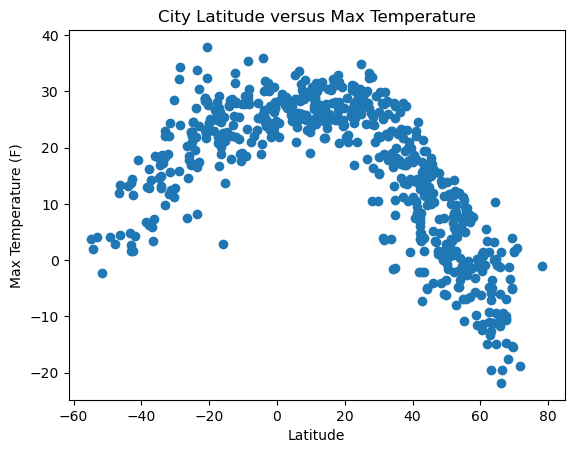

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude versus Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

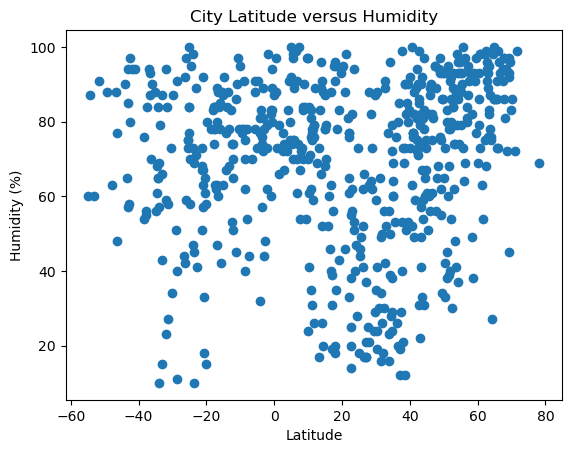

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude versus Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

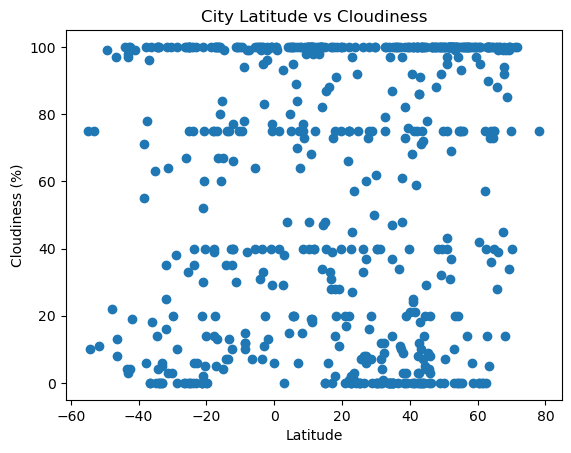

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]
plt.scatter(lat, clouds)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

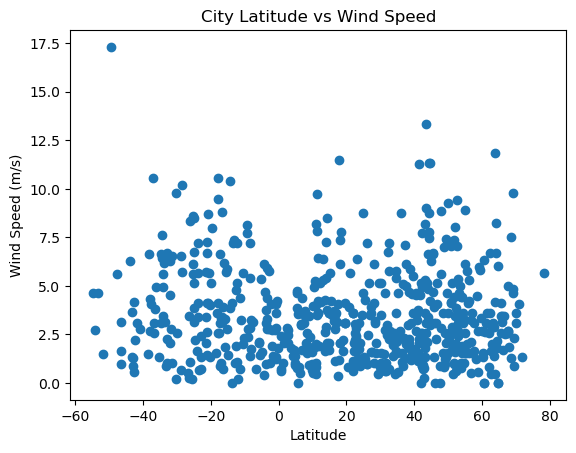

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(lat, wind)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values= x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is: {rvalue}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,qaqortoq,60.7167,-46.0333,0.81,98,100,6.34,GL,1698735393
1,thompson,55.7435,-97.8558,-6.91,73,100,4.12,CA,1698735377
4,san sebastian de la gomera,28.0916,-17.1133,24.20,88,75,4.12,ES,1698735845
5,bilibino,68.0546,166.4372,-17.63,81,14,1.87,RU,1698735381
8,utrik,11.2278,169.8474,28.05,78,100,7.84,MH,1698735417


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.74,77,100,3.87,PN,1698735302
3,morondava,-20.2833,44.2833,27.52,61,5,4.04,MG,1698735844
6,malango,-2.9627,119.9001,30.32,44,83,2.78,ID,1698735434
7,bundaberg north,-24.8551,152.3425,24.56,70,0,3.13,AU,1698735845
9,tingi,-11.3000,35.0333,25.51,45,30,4.38,TZ,1698735845


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8636346388208191


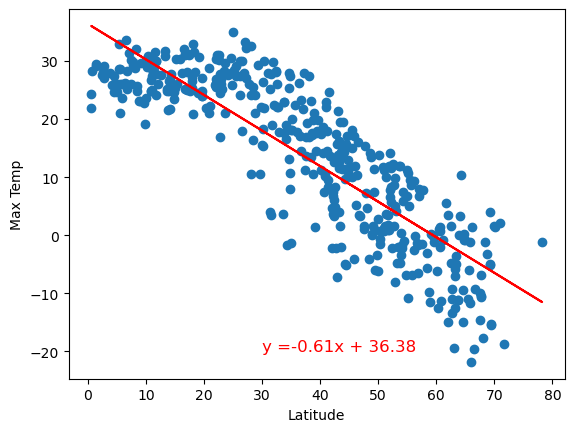

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (30, -20))

The r-value is: 0.7248212646292241


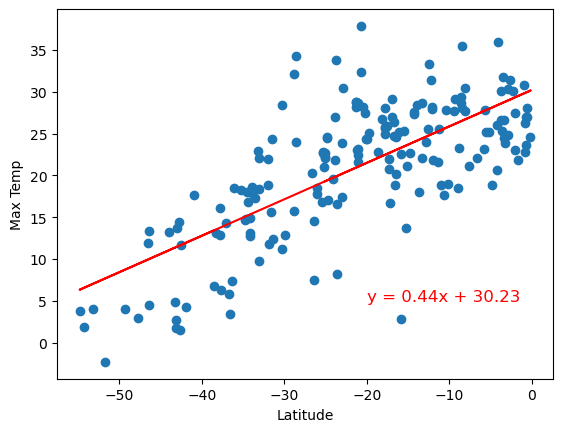

In [34]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-20, 5))

**Discussion about the linear relationship:** 
In Northern Hemisphere, as the Latitude increases Max temp decreases.
In Southern Hemisphere, as the Latitude decreases Max Temp increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21963338338951022


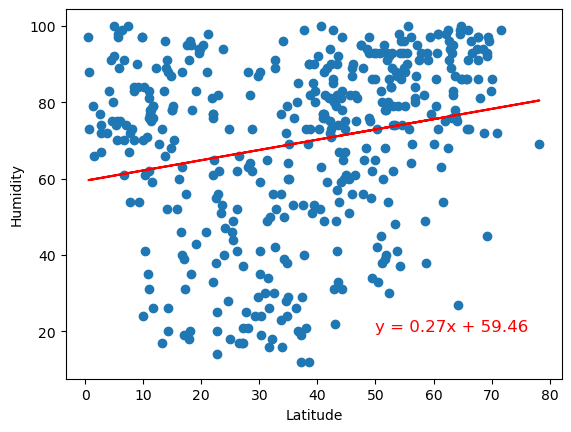

In [18]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 20))

The r-value is: 0.07233103920944756


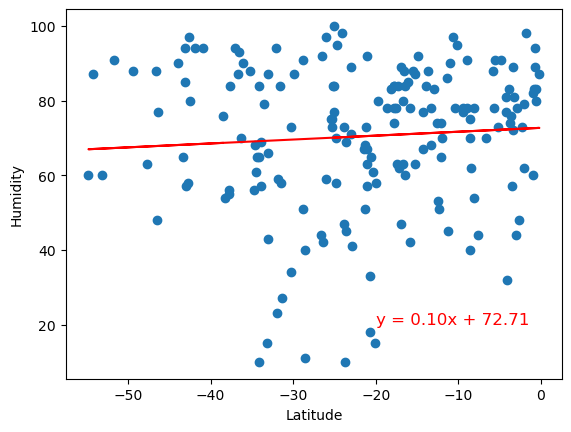

In [33]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 20))

**Discussion about the linear relationship:** There is weak correlation betweem Humidity and Latitude on both Northern and Southern hemisphere since both are closer to zero.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09397540355672497


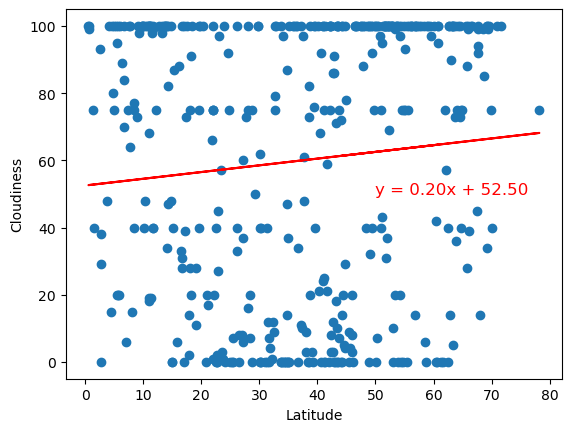

In [32]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (50, 50))

The r-value is: 0.1561495012865389


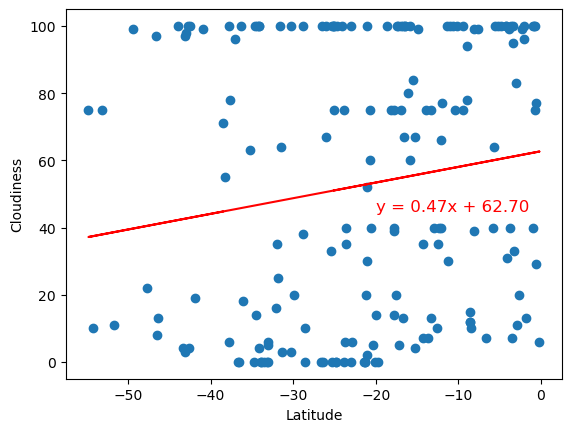

In [31]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-20, 45))

**Discussion about the linear relationship:** There is weak correlation betweem Cloudiness and Latitude on both Northern and Southern hemisphere since both are closer to zero.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08300794089801089


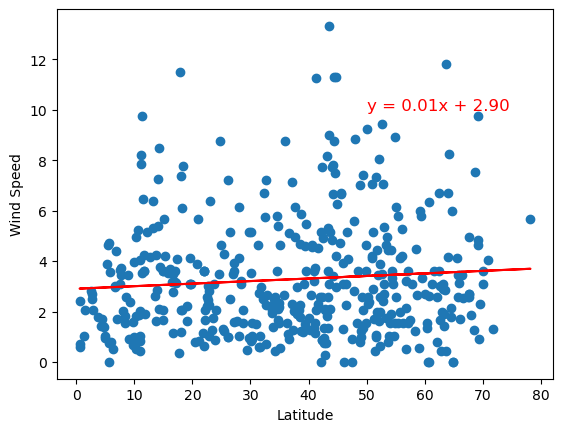

In [27]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (50, 10))

The r-value is: -0.11119285591625956


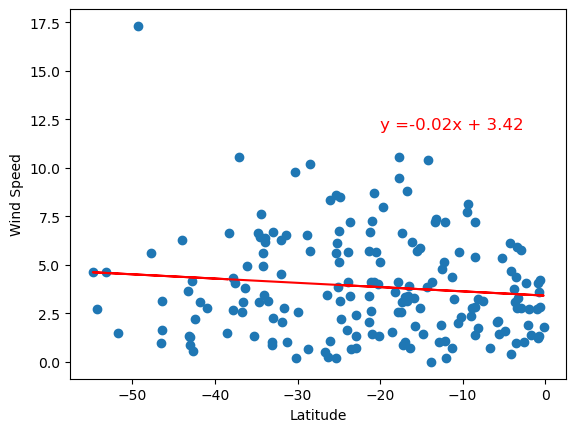

In [29]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-20, 12))

**Discussion about the linear relationship:** There is weak correlation betweem Wind Speed and Latitude on both Northern and Southern hemisphere since both are closer to zero.